##Facial Expression Recognition
- Facial Expression Recognition (FER) is a computer vision project that aims to automatically identify human emotions such as happiness, sadness, anger, surprise, fear, and neutrality by analyzing facial features in images or real-time video. The process typically involves using datasets like FER-2013, preprocessing the images by converting them to grayscale, resizing, and normalizing them, and then training a Convolutional Neural Network (CNN) or using transfer learning with pre-trained models like VGG16 or ResNet. Python, along with libraries like TensorFlow/Keras and OpenCV, is commonly used for development. The trained model can be integrated into applications to detect emotions, making it useful in human-computer interaction, healthcare, and surveillance.

#Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')
import cv2
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Importing datasets

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("msambare/fer2013")

print("Path to dataset files:", path)



Path to dataset files: /kaggle/input/fer2013


#Load the dataset

In [ ]:
TRAIN_DIR = '/kaggle/input/fer2013/train/'
TEST_DIR = '/kaggle/input/fer2013/test/'

These above two lines define the paths to the training and testing datasets in a Kaggle Notebook environment. When running code on Kaggle, any dataset attached to the notebook gets automatically stored inside the /kaggle/input/ directory.

In this case:

- TRAIN_DIR points to the folder that contains the training images for the FER-2013 (Facial Expression Recognition) dataset. This directory likely includes subfolders for each emotion class, such as angry, happy, sad, etc., each containing corresponding training images.

- TEST_DIR points to the folder that contains the testing images from the same dataset. This is used to evaluate the model's performance after training.

These directory paths are used in the script to load images, extract features, and train your facial expression recognition model.

In [ ]:
def load_dataset(directory):
  image_paths = []
  labels = []

  for label in os.listdir(directory):
    for filename in os.listdir(directory + label):
      image_path =os.path.join(directory, label, filename)
      image_paths.append(image_path)
      labels.append(label)

      print(label, "Completed")

  return image_paths, labels


The load_dataset(directory) function is designed to load image file paths and their corresponding labels from a structured dataset directory. In this structure, each subfolder within the main directory represents a different class label (e.g., "happy", "sad", "angry"), and contains image files belonging to that label. The function first initializes two empty lists: one to store the full paths of the images and another to store the labels. It then iterates through each subfolder (label) in the given directory and, within each subfolder, iterates through all image files. For every image, it constructs the full file path using the folder and filename, appends it to the image_paths list, and records the corresponding label in the labels list. A print statement shows when a label’s images are completed (though it's triggered for each image in the current version). Finally, the function returns the list of image paths and their associated labels, which can then be used for further processing like loading or training a machine learning model.

#Convert into train dataframe
- Creating a structured dataset (train) with image paths and their labels, shuffling it for better training performance, and previewing the first few entries.

In [ ]:
train = pd.DataFrame()
train['image'], train['label'] = load_dataset(TRAIN_DIR)
#Shuffle the dataset
train = train.sample(frac=1).reset_index(drop=True)
train.head()

Streaming output truncated to the last 5000 lines.
happy Completed
happy Completed
happy Completed
happy Completed
happy Completed
happy Completed
happy Completed
happy Completed
happy Completed
happy Completed
happy Completed
happy Completed
happy Completed
happy Completed
happy Completed
happy Completed
happy Completed
happy Completed
happy Completed
happy Completed
happy Completed
happy Completed
happy Completed
happy Completed
happy Completed
happy Completed
happy Completed
happy Completed
happy Completed
happy Completed
happy Completed
happy Completed
happy Completed
happy Completed
happy Completed
happy Completed
happy Completed
happy Completed
happy Completed
happy Completed
happy Completed
happy Completed
happy Completed
happy Completed
happy Completed
happy Completed
happy Completed
happy Completed
happy Completed
happy Completed
happy Completed
happy Completed
happy Completed
happy Completed
happy Completed
happy Completed
happy Completed
happy Completed
happy Completed
happy

,image,label
0,/kaggle/input/fer2013/train/happy/Training_446...,happy
1,/kaggle/input/fer2013/train/surprise/Training_...,surprise
2,/kaggle/input/fer2013/train/neutral/Training_1...,neutral
3,/kaggle/input/fer2013/train/surprise/Training_...,surprise
4,/kaggle/input/fer2013/train/neutral/Training_8...,neutral


#Convert into test dataframe
Loading the testing dataset into a table (test) where each row contains:

- The path to an image

- Its correct label (emotion)

In [ ]:
test = pd.DataFrame()
test['image'], test['label'] = load_dataset(TEST_DIR)

test.head()

Streaming output truncated to the last 5000 lines.
angry Completed
angry Completed
angry Completed
angry Completed
angry Completed
angry Completed
angry Completed
angry Completed
angry Completed
angry Completed
angry Completed
angry Completed
angry Completed
angry Completed
angry Completed
angry Completed
angry Completed
angry Completed
angry Completed
angry Completed
angry Completed
angry Completed
angry Completed
angry Completed
angry Completed
angry Completed
angry Completed
angry Completed
angry Completed
angry Completed
angry Completed
angry Completed
angry Completed
angry Completed
angry Completed
angry Completed
angry Completed
angry Completed
angry Completed
angry Completed
angry Completed
angry Completed
angry Completed
angry Completed
angry Completed
angry Completed
angry Completed
angry Completed
angry Completed
angry Completed
angry Completed
angry Completed
angry Completed
angry Completed
angry Completed
angry Completed
angry Completed
angry Completed
angry Completed
angry

,image,label
0,/kaggle/input/fer2013/test/surprise/PublicTest...,surprise
1,/kaggle/input/fer2013/test/surprise/PrivateTes...,surprise
2,/kaggle/input/fer2013/test/surprise/PrivateTes...,surprise
3,/kaggle/input/fer2013/test/surprise/PublicTest...,surprise
4,/kaggle/input/fer2013/test/surprise/PrivateTes...,surprise


#Exploratory Data Analysis

This visualization helps:

- Check for class imbalance (e.g., more "happy" images than "disgust")

- Understand how dataset is distributed before training

- Decide if need to balance the dataset using techniques like oversampling, undersampling, or data augmentation

<Axes: xlabel='count', ylabel='label'>

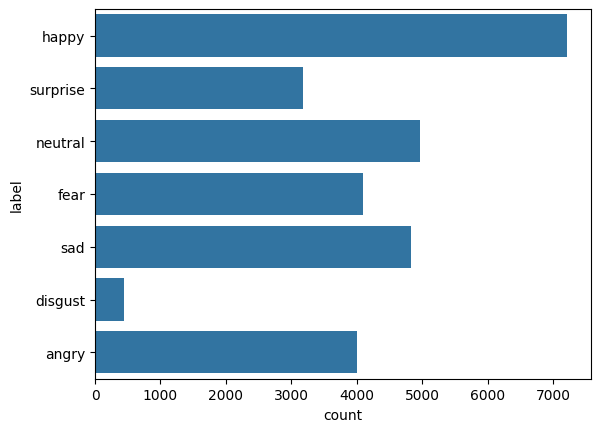

In [ ]:
import seaborn as sns
sns.countplot(train['label'])

It loads and visually displays the first image in the dataset. This is helpful for:

- Verifying the image path works

- Confirming that images are loading correctly

- Checking if the images are in the expected format (e.g., size, color)



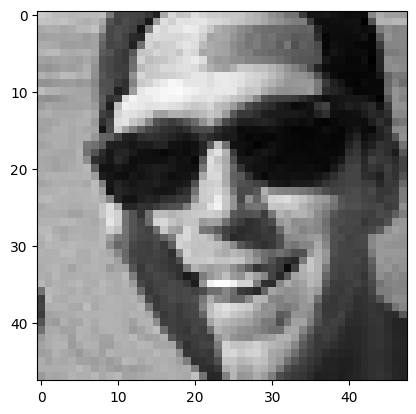

In [ ]:
from PIL import Image
img = Image.open(train['image'][0])
plt.imshow(img, cmap='gray')

#To display grid of images

This block of code is used to visually display the first 25 images from the training dataset in a 5x5 grid layout. First, a large figure is created using plt.figure(figsize=(20,20)) to ensure that all images and labels are clearly visible. The code then selects the first 25 rows from the training DataFrame, which contain image file paths and their corresponding emotion labels. It loops through each selected row using itertuples(), which provides the index, image path, and label. For each image, it creates a subplot within the 5x5 grid using plt.subplot(5, 5, index+1), loads the image from its path using load_img(), and converts it into a NumPy array to prepare it for plotting. The image is displayed using plt.imshow(), and its label is shown as the title above the image. Finally, the axis is turned off for a cleaner look. This visualization is helpful for quickly reviewing the dataset to ensure that images are loading properly and that their labels are correct.

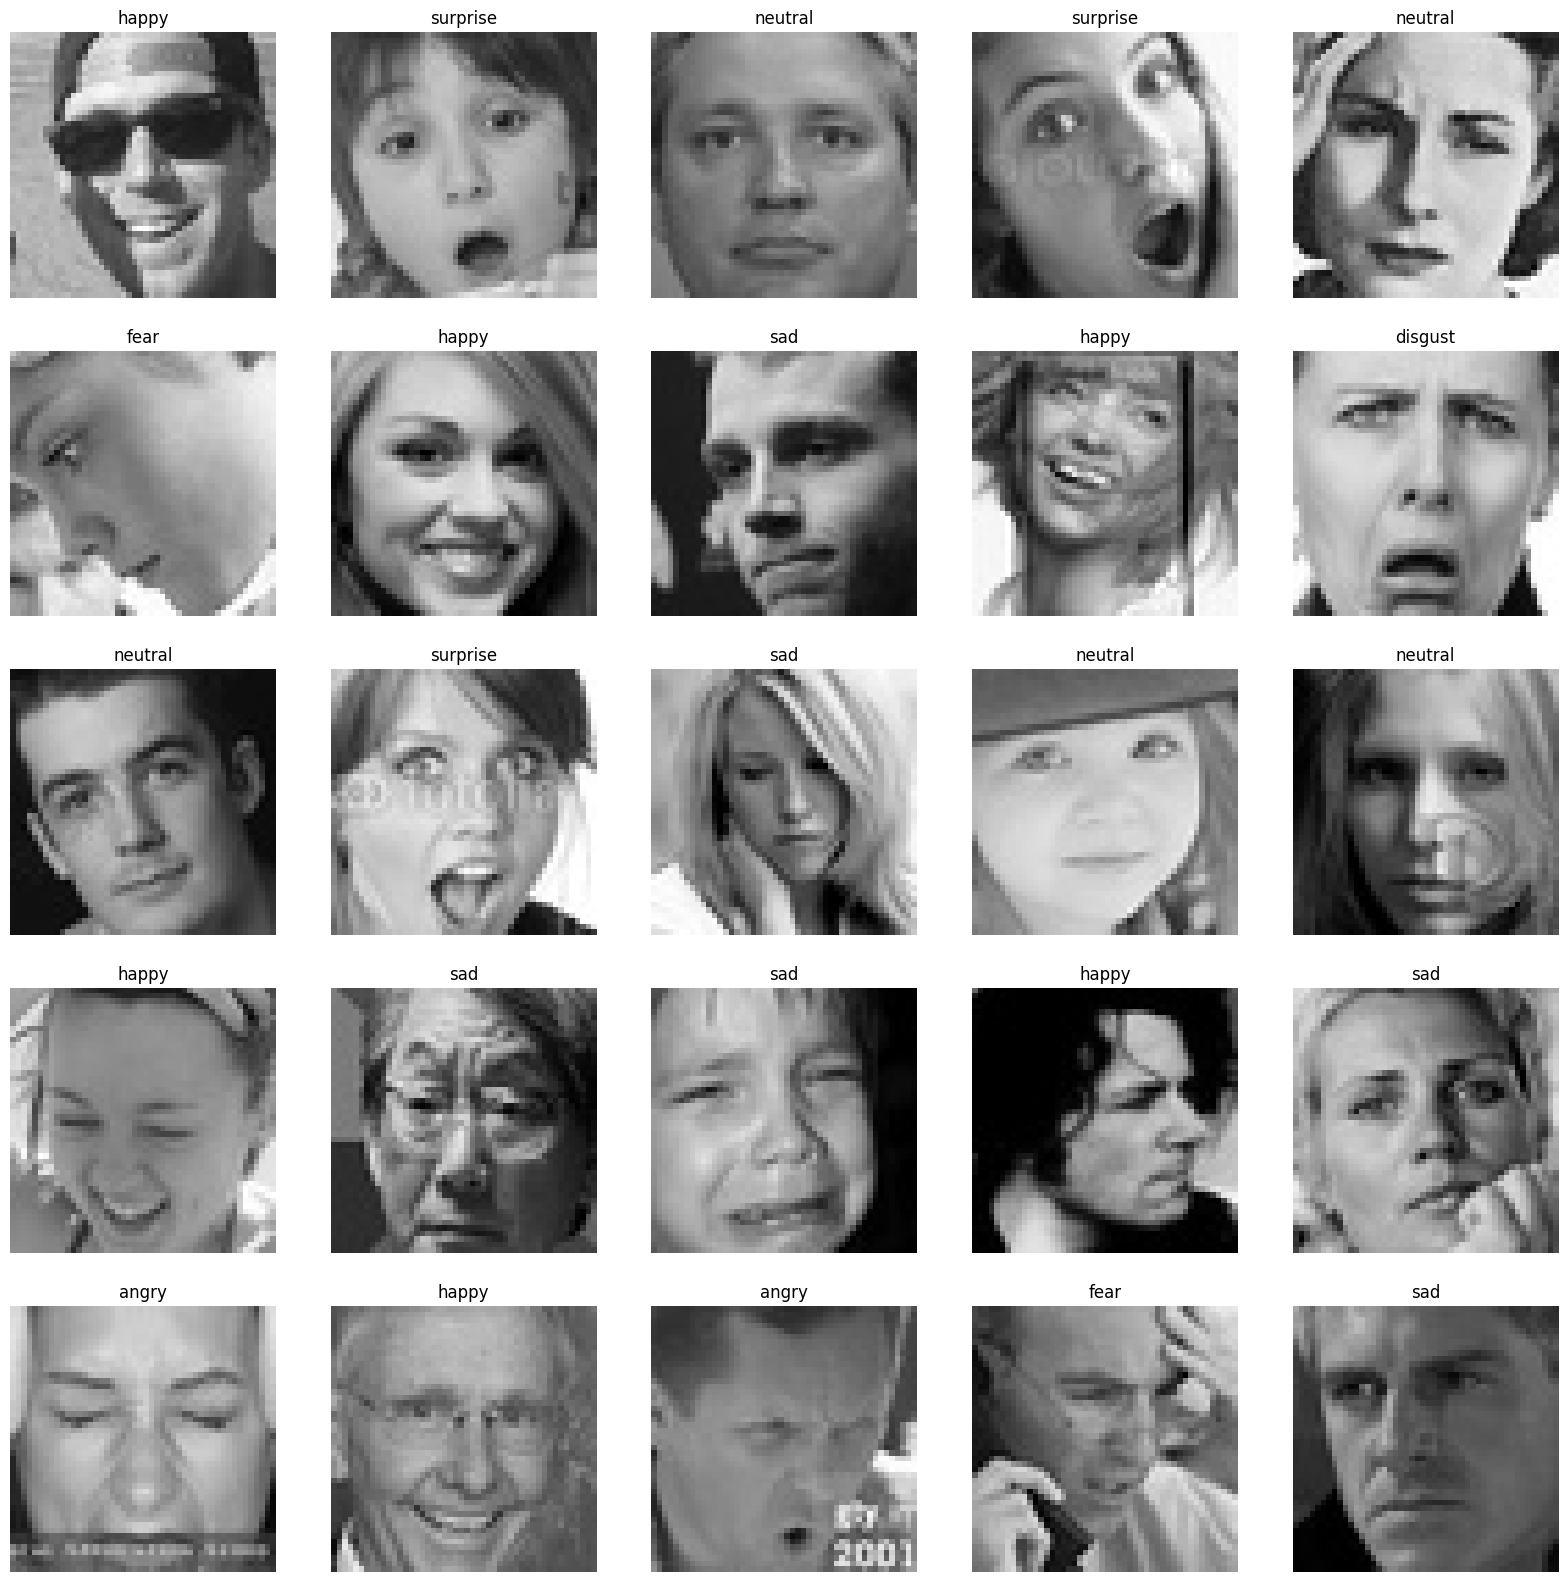

In [ ]:
plt.figure(figsize=(20,20))
files = train.iloc[0:25]

for index, file, label in files.itertuples():
  plt.subplot(5,5,index+1)
  img = load_img(file)
  img = np.array(img)
  plt.imshow(img)
  plt.title(label)
  plt.axis('off')

#Feature Extraction

In [ ]:
from tqdm import tqdm

def extract_features(images):
  features = []
  for image in tqdm(images):
    img = load_img(image, color_mode= 'grayscale')
    img = np.array(img)
    features.append(img)
  features = np.array(features)
  features = features.reshape(len(features), 48, 48, 1)
  return features

This function extract_features(images) is used to load and preprocess images so they can be used for training a machine learning model, particularly for tasks like facial expression recognition. Here's a detailed explanation:

- The function takes a list of image file paths (images) as input. It uses a progress bar (tqdm) to show the loading status in real time, which is helpful when working with a large dataset. Inside the loop, each image is loaded using load_img(image, color_mode='grayscale'), which ensures the image is read in grayscale format (important for FER-2013, since the images are grayscale). After loading, the image is converted into a NumPy array with np.array(img) so it can be handled numerically in further steps like model training. Each image array is appended to a list called features.

Once all images have been processed, the list of image arrays is converted into a NumPy array (features = np.array(features)). Then, it is reshaped into a 4D array with the shape (number_of_images, 48, 48, 1). This shape is required by most deep learning models (like CNNs), where:

- 48x48 is the image size,

- 1 is the number of channels (since grayscale),

- and each image is a separate entry in the dataset.

Finally, the function returns the fully preprocessed features array, ready to be fed into a deep learning model for training or prediction.

#Extract The Feature


In [ ]:
train_features = extract_features(train['image'])

100%|██████████| 28709/28709 [01:26<00:00, 331.52it/s]


This line of code uses the previously defined extract_features function to preprocess the images in the training dataset. Specifically, it takes the list of image file paths from the train['image'] column of the DataFrame and passes them to the extract_features function. Inside the function, each image is loaded in grayscale, converted into a NumPy array, and reshaped into the required format of (48, 48, 1) for each image. These processed images are then stored in a 4D array, where the first dimension represents the number of images, the second and third represent the image dimensions (48x48 pixels), and the fourth represents the single grayscale channel. The resulting array, train_features, contains the preprocessed images and is now ready for use in training a machine learning or deep learning model.

In [ ]:
test_features = extract_features(test['image'])

100%|██████████| 7178/7178 [00:37<00:00, 192.42it/s]


This line of code uses the extract_features function to preprocess the images in the test dataset. It takes the list of image file paths from the test['image'] column of the test DataFrame and passes them into the extract_features function. Inside the function, each image is loaded in grayscale, converted into a NumPy array, and reshaped into the required format of (48, 48, 1) for each image. This ensures that the test images have the same dimensions and structure as the training images. The preprocessed images are then stored in the test_features variable, which holds a 4D NumPy array. This array represents the test dataset, where the first dimension corresponds to the number of test images, the second and third dimensions correspond to the image size (48x48 pixels), and the fourth dimension corresponds to the single grayscale channel. The test_features array is now ready to be used for evaluating a trained machine learning or deep learning model.

#Normalize the image











In [ ]:
x_train = train_features/255.0
x_test = test_features/255.0

This code ensures that all image pixel values are scaled between 0 and 1, preparing the data for effective model training and evaluation.

#Convert label to integer

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train['label'])
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

This code uses LabelEncoder from the sklearn.preprocessing module to convert categorical emotion labels (like "happy", "angry", "sad") into numeric values (like 0, 1, 2). First, a LabelEncoder object is created and stored in the variable le. Then, the encoder is fitted on the training labels using le.fit(train['label']), which means it learns all the unique label classes. After fitting, the labels in both the training and test datasets are transformed into their corresponding numeric codes using le.transform(). The result is stored in y_train and y_test, which now contain the numeric versions of the emotion labels. This conversion is essential because most machine learning models cannot work directly with text labels—they need numbers to learn and make predictions.

In [ ]:
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

This code converts the numeric emotion labels in y_train and y_test into one-hot encoded vectors using the to_categorical() function. One-hot encoding transforms each label into a vector of length equal to the number of classes (in this case, 7 emotions). Each vector contains a 1 at the index of the corresponding class and 0s elsewhere. For example, if a label is 3, it becomes [0, 0, 0, 1, 0, 0, 0]. This format is essential for training neural networks for multi-class classification, as it allows the model to output probabilities for each class and compare them with the one-hot encoded true label using loss functions like categorical_crossentropy.

In [ ]:
y_train[0]

array([0., 0., 0., 1., 0., 0., 0.])

In [ ]:
#Config
input_shape = (48, 48, 1)
output_class = 7

This line sets up the basic configuration for the neural network model, specifically defining the input shape of the images and the number of output classes.

#Model Creation




In [ ]:
model = Sequential()
#Convolution layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape= input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.10))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.10))


model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.10))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.10))

model.add(Flatten())

#fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.10))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

#Output layer
model.add(Dense(output_class, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



This code builds and compiles a Convolutional Neural Network (CNN) for facial expression recognition using Keras.

- Model Initialization: Sequential() creates a linear stack of layers.

- Convolution + Pooling Layers:
     - 4 convolutional blocks (Conv2D → MaxPooling2D → Dropout) extract important features like edges, shapes, and patterns from the input image.

     - Filters increase progressively (128 → 256 → 512 → 512) to learn more complex features.

- Flatten Layer: Converts 2D feature maps into a 1D vector to pass into dense layers.

- Fully Connected Layers:

     - Two dense layers (512 and 256 units) learn final patterns from extracted features.

     - Dropout is used to reduce overfitting.

- Output Layer:

     - A dense layer with softmax activation outputs probabilities for each of the emotion classes.

- Model Compilation:

    - Optimizer: adam (efficient and adaptive).

    - Loss: categorical_crossentropy (for multi-class classification).

    - Metric: accuracy (to evaluate model performance).

#Train the model

In [ ]:
history = model.fit(x=x_train, y=y_train, batch_size=128, epochs=100, verbose=1, validation_data=(x_test, y_test))

Epoch 1/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 33s 87ms/step - accuracy: 0.2334 - loss: 1.8496 - val_accuracy: 0.2471 - val_loss: 1.8067
Epoch 2/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - accuracy: 0.2565 - loss: 1.7923 - val_accuracy: 0.3718 - val_loss: 1.6081
Epoch 3/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 21s 50ms/step - accuracy: 0.3943 - loss: 1.5562 - val_accuracy: 0.4682 - val_loss: 1.3667
Epoch 4/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - accuracy: 0.4763 - loss: 1.3686 - val_accuracy: 0.5189 - val_loss: 1.2588
Epoch 5/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.5134 - loss: 1.2763 - val_accuracy: 0.5249 - val_loss: 1.2279
Epoch 6/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 21s 51ms/step - accuracy: 0.5396 - loss: 1.2128 - val_accuracy: 0.5573 - val_loss: 1.1593
Epoch 7/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - accuracy: 0.5790 - loss: 1.1263 - val_accuracy: 0.5600 - val_loss: 1.1465
Epoch 8/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - accuracy: 0.6060 - loss: 1

This line trains the neural network model using the training data (x_train and y_train) for 100 epochs, with a batch size of 128 samples per training step. The fit() function handles the training process, and the validation_data parameter allows the model to evaluate its performance on the test dataset (x_test, y_test) after each epoch. The verbose=1 setting ensures that training progress, including loss and accuracy for both training and validation, is displayed in the output. The training history, such as accuracy and loss values across all epochs, is saved in the history variable, which can later be used for plotting performance graphs or further analysis.

#Plot the Results

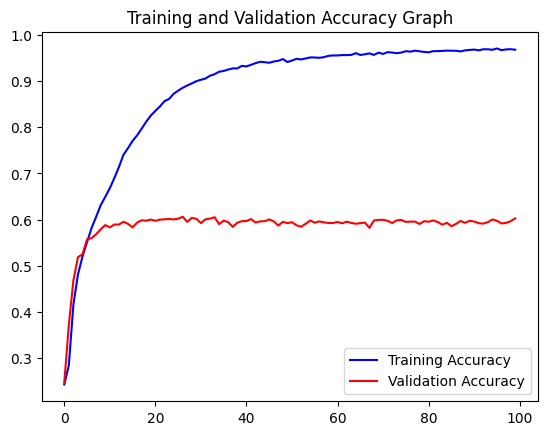

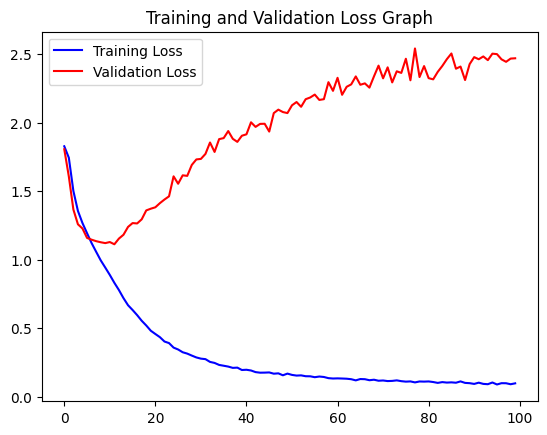

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs =  range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs =  range(len(loss))

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss Graph')
plt.legend()
plt.show()

This block of code is used to visualize the training progress of the model by plotting the accuracy and loss curves over all epochs. It helps evaluate how well the model is learning and whether it's overfitting or underfitting.

#Test with Image Data

Original output angry
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted output: angry


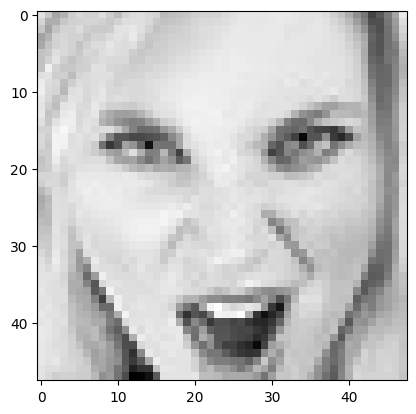

In [ ]:
import random
image_index = random.randint(0, len(test))
print("Original output", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1,48,48,1))
predication_lable = le.inverse_transform([pred.argmax()])[0]
print("Predicted output:", predication_lable)
plt.imshow(x_test[image_index].reshape(48,48), cmap='gray')

This code is used to test a trained facial expression recognition model by randomly selecting and evaluating one image from the test dataset. First, it imports the random module and selects a random index within the range of the test dataset. It then prints the actual label (i.e., the true emotion) of the selected image. The image is reshaped to match the input shape expected by the model—specifically (1, 48, 48, 1)—so it can be passed into the model for prediction. The model outputs a probability distribution across all emotion classes, and the index of the highest probability is selected as the predicted class. Using a label encoder (le), this numerical prediction is converted back into a readable emotion label, which is then printed. Finally, the selected test image is displayed in grayscale using Matplotlib, allowing visual verification of the model's prediction against the actual image. This process provides a quick and intuitive way to evaluate model performance on individual test samples.